# Convolutional Neural Network
This model determine cats from dogs with a validation accuracy of 87.48%.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.python.client import device_lib

In [2]:
tf.__version__

'2.4.1'

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("\n", device_lib.list_local_devices()[1])

Num GPUs Available:  1

 name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7303936096
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1110672608535927082
physical_device_desc: "device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:65:00.0, compute capability: 7.5"



### Preprocessing the Training set

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/mnt/data/dogs_vs_cats/train',
  seed=123,
  image_size=(64, 64),
  batch_size=32)

Found 20000 files belonging to 2 classes.


### Preprocessing the Test set

In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/mnt/data/dogs_vs_cats/test/',
  seed=123,
  image_size=(64, 64),
  batch_size=32)

Found 5000 files belonging to 2 classes.


In [6]:
class_names = train_ds.class_names
class_names

['cats', 'dogs']

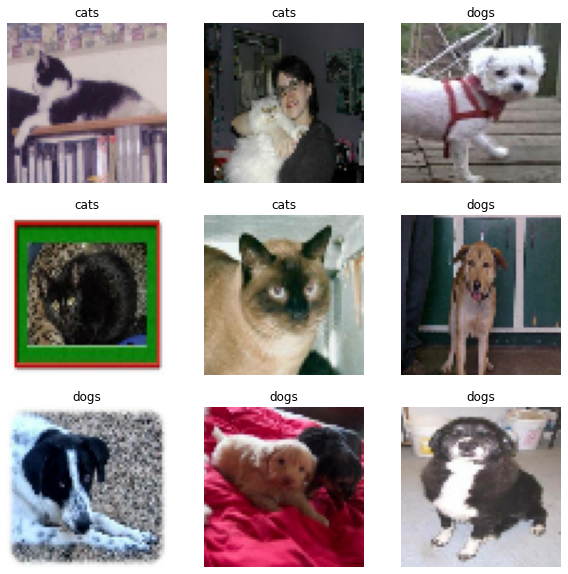

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Configure the dataset for performance

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Data augmentation to fight overfiting

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(64, 
                                                              64,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

### Create the model

In [10]:
num_classes = 2
cnn_model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(64, 64, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model

In [11]:
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary
The layers of the network 

In [12]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 64, 64, 3)         0         
_________________________________________________________________
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)       

### Train the model

In [13]:
from time import perf_counter
epochs=200
start_time = perf_counter()
history = cnn_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
end_time = perf_counter()
print(f'Completion Time: {end_time - start_time}')

Epoch 1/200
625/625 [==============================] - 26s 13ms/step - loss: 0.6545 - accuracy: 0.6055 - val_loss: 0.5472 - val_accuracy: 0.7218
Epoch 2/200
625/625 [==============================] - 2s 4ms/step - loss: 0.5537 - accuracy: 0.7162 - val_loss: 0.4876 - val_accuracy: 0.7700
Epoch 3/200
625/625 [==============================] - 2s 3ms/step - loss: 0.5180 - accuracy: 0.7387 - val_loss: 0.5247 - val_accuracy: 0.7268
Epoch 4/200
625/625 [==============================] - 2s 4ms/step - loss: 0.4915 - accuracy: 0.7623 - val_loss: 0.4278 - val_accuracy: 0.8034
Epoch 5/200
625/625 [==============================] - 2s 3ms/step - loss: 0.4662 - accuracy: 0.7813 - val_loss: 0.4214 - val_accuracy: 0.8050
Epoch 6/200
625/625 [==============================] - 2s 4ms/step - loss: 0.4508 - accuracy: 0.7912 - val_loss: 0.4450 - val_accuracy: 0.7876
Epoch 7/200
625/625 [==============================] - 2s 4ms/step - loss: 0.4345 - accuracy: 0.7979 - val_loss: 0.3833 - val_accuracy: 0.82

Epoch 58/200
625/625 [==============================] - 2s 4ms/step - loss: 0.2490 - accuracy: 0.8901 - val_loss: 0.3391 - val_accuracy: 0.8522
Epoch 59/200
625/625 [==============================] - 2s 4ms/step - loss: 0.2545 - accuracy: 0.8901 - val_loss: 0.3093 - val_accuracy: 0.8620
Epoch 60/200
625/625 [==============================] - 2s 4ms/step - loss: 0.2539 - accuracy: 0.8927 - val_loss: 0.2981 - val_accuracy: 0.8760
Epoch 61/200
625/625 [==============================] - 2s 4ms/step - loss: 0.2500 - accuracy: 0.8949 - val_loss: 0.3387 - val_accuracy: 0.8538
Epoch 62/200
625/625 [==============================] - 2s 4ms/step - loss: 0.2471 - accuracy: 0.8944 - val_loss: 0.3049 - val_accuracy: 0.8736
Epoch 63/200
625/625 [==============================] - 2s 4ms/step - loss: 0.2448 - accuracy: 0.8951 - val_loss: 0.2965 - val_accuracy: 0.8750
Epoch 64/200
625/625 [==============================] - 2s 4ms/step - loss: 0.2361 - accuracy: 0.9006 - val_loss: 0.3223 - val_accuracy:

Epoch 115/200
625/625 [==============================] - 2s 4ms/step - loss: 0.1949 - accuracy: 0.9199 - val_loss: 0.2959 - val_accuracy: 0.8828
Epoch 116/200
625/625 [==============================] - 2s 4ms/step - loss: 0.2007 - accuracy: 0.9139 - val_loss: 0.3732 - val_accuracy: 0.8516
Epoch 117/200
625/625 [==============================] - 2s 4ms/step - loss: 0.1981 - accuracy: 0.9182 - val_loss: 0.3067 - val_accuracy: 0.8794
Epoch 118/200
625/625 [==============================] - 2s 4ms/step - loss: 0.1943 - accuracy: 0.9176 - val_loss: 0.3027 - val_accuracy: 0.8796
Epoch 119/200
625/625 [==============================] - 2s 4ms/step - loss: 0.1954 - accuracy: 0.9200 - val_loss: 0.3120 - val_accuracy: 0.8802
Epoch 120/200
625/625 [==============================] - 2s 4ms/step - loss: 0.1870 - accuracy: 0.9201 - val_loss: 0.3188 - val_accuracy: 0.8758
Epoch 121/200
625/625 [==============================] - 2s 4ms/step - loss: 0.1917 - accuracy: 0.9207 - val_loss: 0.3379 - val_ac

### Visualize training results

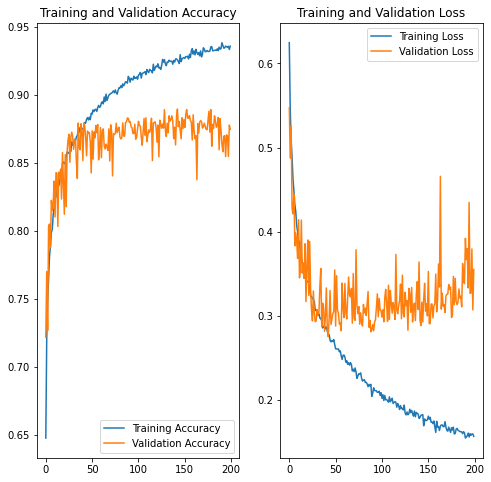

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predict on new data

In [16]:
# test_cat_file = '/mnt/data/archive/test/test_cat.jpg'
# test_dog_file = '/mnt/data/archive/test/dog.4002.jpg'

img_url = "http://www.luckygoldenretriever.com/wp-content/uploads/2016/12/Cleaning_Your_Dogs_Ears.jpg"
img_path = tf.keras.utils.get_file('dog1', origin=img_url)

img = keras.preprocessing.image.load_img(
    img_path, target_size=(64, 64)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 


predictions = cnn_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to dogs with a 90.02 percent confidence.


### Save the model

In [17]:
cnn_model.save('catdog_cnn_model.h5')